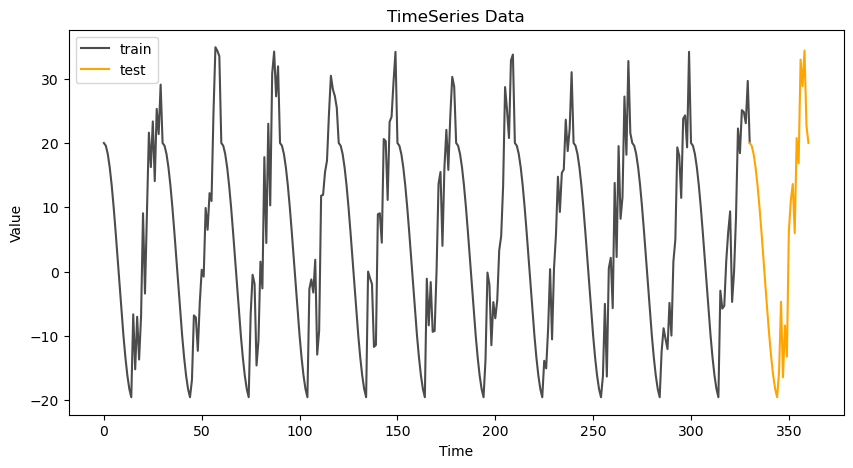

In [18]:
# cos 함수를 이용하여 데이터 만들기

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

np.random.seed(2020)

time = np.arange(30 * 12 + 1)
month_time = (time % 30) / 30
time_series = 20 * np.where(month_time < 0.5, 
                            np.cos(2 * np.pi * month_time),
                            np.cos(2 * np.pi * month_time) + np.random.random(361))

plt.figure(figsize = (10, 5))
plt.title('TimeSeries Data')
plt.xlabel('Time')
plt.ylabel('Value')

# 학습용 데이터
plt.plot(np.arange(0, 30 * 11 + 1), time_series[:30 * 11 + 1],
         color = 'black', alpha = 0.7, label = 'train')

# 테스트용 데이터
plt.plot(np.arange(30 * 11, 30 * 12 + 1), time_series[30 * 11:],
         color = 'orange', label = 'test')

plt.legend()
plt.show()

In [2]:
# 전처리 과정 수행하기

def make_sequence(time_series, n):
    x_train, y_train = list(), list()

    for i in range(len(time_series)):
        x = time_series[i:(i + n)]
        if (i + n) < len(time_series):
            x_train.append(x)
            y_train.append(time_series[i + n])
        else:
            break
    
    return np.array(x_train), np.array(y_train)

n = 10 # 주기 설정
x_train, y_train = make_sequence(time_series, n)

x_train = x_train.reshape(-1, n, 1)
y_train = y_train.reshape(-1, 1)

In [3]:
from sklearn.model_selection import train_test_split

patial_x_train = x_train[:30 * 11]
patial_y_train = y_train[:30 * 11]
x_test = x_train[30 * 11:]
y_test = y_train[30 * 11:]

print('partial_train:', patial_x_train.shape, patial_y_train.shape)
print('test:', x_test.shape, y_test.shape)

train: (330, 10, 1) (330, 1)
test: (21, 10, 1) (21, 1)


In [4]:
# 데이터 형태 확인하기
test_arr = np.arange(100)
a, b = make_sequence(test_arr, 10)

for i in range(1, 4):
    print(a[i],'|', b[i])

[ 1  2  3  4  5  6  7  8  9 10] | 11
[ 2  3  4  5  6  7  8  9 10 11] | 12
[ 3  4  5  6  7  8  9 10 11 12] | 13


In [5]:
from tensorflow.keras.layers import SimpleRNN, Flatten, Dense
from tensorflow.keras.models import Sequential

model = Sequential()

# SimpleRNN 층을 첫 번째 층으로 사용하는 경우,
# 반드시 input_shape를 명시해주어야 합니다.
model.add(SimpleRNN(units = 32, activation = 'tanh', input_shape = (n, 1)))
model.add(Dense(1, activation = 'linear'))

model.compile(optimizer = 'adam', loss = 'mse')
model.summary()

C:\Users\human\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 32)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# 모델 학습 시키기
# model.fit(x_train, y_train, epochs = 200, batch_size = 12)

model.fit(patial_x_train, patial_y_train, epochs = 100, batch_size = 12)

Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 31s 29ms/step - loss: 274.1628
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 219.0661
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 189.1588
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 166.0959
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 146.5077
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 115.9701
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 122.0189 
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 107.3791
Epoch 9/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 92.0052
Epoch 10/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 93.7285
Epoch 11/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 91.5425
Epoch 12/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 87.3704
Epoch 13/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 79.1134
Epoch 14/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 76.6034
Epoch 15/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


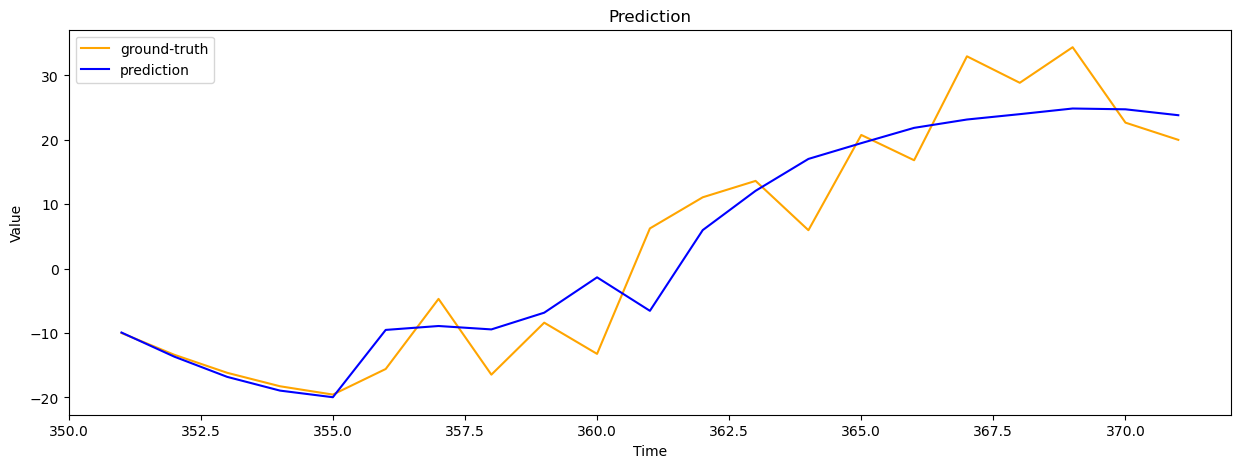

In [13]:
# 예측 결과 그려보기
pred = model.predict(x_test)

pred_range = np.arange(len(y_train), len(y_train) + len(pred))

plt.figure(figsize=(15,5))
plt.title('Prediction')
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(pred_range, y_test.reshape(-1), color = 'orange', label='ground-truth')
plt.plot(pred_range, pred.reshape(-1), color = 'blue', label='prediction')
plt.legend()
plt.show()


In [14]:
# IMDB 데이터셋 사용하기

from tensorflow.keras.datasets import imdb

# 1 ~ 10,000 빈도 순위에 해당하는 단어만 사용
num_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = num_words)

In [15]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 각 데이터의 최대 길이를 500으로 동일하게 맞추기
max_len = 500

pad_X_train = pad_sequences(X_train, maxlen=max_len)
pad_X_test = pad_sequences(X_test, maxlen=max_len)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding

model = Sequential()

model.add(Embedding(input_dim = num_words, output_dim = 32))
# 새로운 인자 3개가 사용되었습니다.
# return_sequences, dropout, recurrent_dropout
model.add(SimpleRNN(32, return_sequences=True, dropout=0.15, recurrent_dropout=0.15))
model.add(SimpleRNN(32))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_4 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [23]:
history = model.fit(pad_X_train, y_train, batch_size=32, epochs = 15, validation_split=0.2)

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 336s 444ms/step - acc: 0.5082 - loss: 0.7014 - val_acc: 0.5682 - val_loss: 0.6785
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 197s 314ms/step - acc: 0.5704 - loss: 0.6728 - val_acc: 0.5736 - val_loss: 0.6675
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 161s 258ms/step - acc: 0.6478 - loss: 0.6196 - val_acc: 0.5838 - val_loss: 0.6533
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 256s 410ms/step - acc: 0.7067 - loss: 0.5615 - val_acc: 0.5902 - val_loss: 0.6704
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 169s 271ms/step - acc: 0.7294 - loss: 0.5290 - val_acc: 0.5926 - val_loss: 0.6879
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 110s 176ms/step - acc: 0.7528 - loss: 0.5019 - val_acc: 0.5898 - val_loss: 0.7604
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 94s 151ms/step - acc: 0.7742 - loss: 0.4653 - val_acc: 0.5876 - val_loss: 0.7781
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 69s 110ms/step - acc: 0.7901 - loss: 0.4386 - val_acc: 0.5886 - val_loss: 0.8091
Epoch 9/15
625/625 ━━━━━━━

In [24]:
# SimpleRNN층의 출력값 변화 확인하기

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense

model = Sequential()

model.add(Embedding(input_dim = 10000, output_dim = 32))
# 전체 상태 시퀀스를 반환하거나,
# 마지막 시점의 상태 시퀀스만 반환합니다.
# 주석을 바꿔가면서 출력값 변화를 확인해보세요.
model.add(SimpleRNN(32, return_sequences = True))
# model.add(SimpleRNN(32, return_sequences = Flase))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

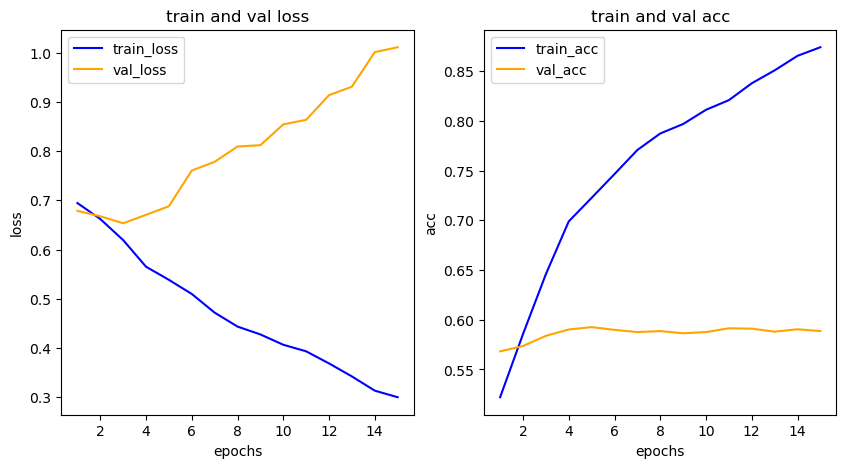

In [25]:
# 학습 과정 그리기
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()